# RBM Sampling Test + Deap Summary

## Install and import dependencies

In [ ]:
from deap import base, creator, tools
import random

## Test Problems

### OneMax Problem

The OneMax Problem (or BitCounting) is a simple problem consisting in maximizing the number of ones of a bitstring.

Formally, this problem can be described as finding a string $\vec{x}=\{x_1,x_2,\ldots,x_N\}$, with $x_i\in\{0,1\}$, 
that maximizes the following equation:

$F(\vec{x})=\sum\limits_{i=1}^{N}{x_i}$

In order to define an instance of this problem only is needed to define the length of the bitstring ($N$). For a given $N$,
 the optimum solution of the problem is a string with $N$ ones, i.e., all bits of the string are set to one.

### Concatenated Deceptive Traps

$TF(x_1,\ldots,x_l)=\sum\limits_{j=0}^{\frac{l}{k}-1}{B(x_{j \cdot k+1},\ldots,x_{j \cdot k+k})}$

$B(x_1,\ldots,x_k)=\begin{cases}k & \text{if } \sum{x_i}=k \\k-d-\frac{k-d}{k-1}\sum{x_i} & \text{if } \sum{x_i} \lt k\end{cases}$

Deceptive functions are functions
where the lower-order schema fitness averages that contain the local optimum 
have a higher value than the lower-order schema fitness averages that contain the
global optimum in each subfunction.

**For example**: $k=4$ $\wedge$ $d=1$ $\wedge$ $l=100 \implies (x_1,x_2,\ldots,x_{100})$

<table style="border: 1px double black; margin: 10px 0 10px 0">
    <tbody>
        <tr>
            <td style="font-weight: bold; border-widht: 1px; border-right-style: double; padding: 0 10px 0 10px;">Number of Ones</td>
            <td style="border: 1px solid black; padding: 0 10px 0 10px;">4</td>
            <td style="border: 1px solid black; padding: 0 10px 0 10px;">3</td>
            <td style="border: 1px solid black; padding: 0 10px 0 10px;">2</td>
            <td style="border: 1px solid black; padding: 0 10px 0 10px;">1</td>
            <td style="border: 1px solid black; padding: 0 10px 0 10px;">0</td>
        </tr>
        <tr>
            <td style="font-weight: bold; border-widht: 1px; border-right-style: double; padding: 0 10px 0 10px;">Fitness Value</td>
            <td style="border: 1px solid black; padding: 0 10px 0 10px;">4</td>
            <td style="border: 1px solid black; padding: 0 10px 0 10px;">0</td>
            <td style="border: 1px solid black; padding: 0 10px 0 10px;">1</td>
            <td style="border: 1px solid black; padding: 0 10px 0 10px;">2</td>
            <td style="border: 1px solid black; padding: 0 10px 0 10px;">3</td>
        </tr>
    <tbody>
</table>

Trap functions consist of $25$ concatenated subfunctions of length $k = 4$, each
having an optimum at $1111$ and at $0000$. The overall function has therefore $2^{25} - 1$
local optima and $1$ global optimum when the string is full of ones.

$\begin{cases} F(111*)=\frac{4+0}{2}=2 \\F(000*)=\frac{3+2}{2}=2.5 \end{cases}$

$\begin{cases} F(11**)=\frac{4+0+1}{4}=1.25 \\F(00**)=\frac{3+2+2+1}{4}=2.5 \end{cases}$

$\begin{cases} F(1***)=\frac{4+0+3 \cdot 1+2}{8}=1.125 \\F(0***)=\frac{3+3 \cdot 2+3 \cdot 1+0}{8}=1.5 \end{cases}$

## DEAP usage example

## TODO

- __creator__: Class for creating containers of attributes, associated with fitnesses. It is a class factory that can build new classes at run-time. 

    It will be called with first the desired name of the new class, second the base class it will inherit, and in addition any subsequent arguments 
    you want to become attributes of your class.

    ```
    creator.create("FitnessMax", base.Fitness, weights=(1.0,))
    creator.create("Individual", list, fitness=creator.FitnessMax)
    ```

    In the example above we first define *FitnessMax*, which inherits from *deap.base.Fitness* class, with an additional attribute called *weights*. 
    Subsequently, we create the class *Individual*, will inherit the class *list* and contain our previously defined *FitnessMax* class in its 
    *fitness* attribute.

    __NOTE__: upon creation all our defined classes will be part of the creator container and can be called directly.

- __toolbox__: Class that contains the evolutionary operators: Selection, crossover, mutation, evaluation and so on.
    
    It is intended to contain all evolutionary tools, from the object initializers to the evaluation operator. 
    
    There are mainly 2 methods that allow us to specify which operators will be used, `toolbox.register(alias,function,arguments)` and 
    `toolbox.unregister(alias)`.

    ```
    toolbox = base.Toolbox()
    
    def evaluateInd(individual):
        return result,

    toolbox.register("mate", tools.cxTwoPoint)
    toolbox.register("mutate", tools.mutGaussian, mu=0, sigma=1, indpb=0.2)
    toolbox.register("select", tools.selTournament, tournsize=3)
    toolbox.register("evaluate", evaluateInd)
    ```

    Registering tools helps with keeping the rest of the algorithms independent from the operator set. These tools can be used by calling them by 
    their generic name, the name used for registering them.

    ```
    offspring = toolbox.select(pop, len(pop))
    ```

- __Evaluation Function__:  The typical evaluation function takes one individual as argument and returns its fitness as a tuple. 
    It is the only part of the library that you must write yourself. The evaluation function must return a tuple because 
    single-objective is treated as a special case of multi-objective.

- __Mutation__: Each mutation has its own characteristics and may be applied to different types of individuals. The general rule for mutation 
    operators is that they only mutate, this means that an independent copy must be made prior to mutating the individual if the original individual 
    has to be kept or is a reference to another individual.

    ```
    mutant = toolbox.clone(ind1)
    ind2, = tools.mutGaussian(mutant, mu=0.0, sigma=0.2, indpb=0.2)
    del mutant.fitness.values
    ```

    The fitness’ values are deleted because they’re not related to the individual anymore.

- __Crossover__: 

- __Useful Links__:
    - [Built-in evolutionary tools](https://deap.readthedocs.io/en/master/api/tools.html)
    - [Benchmarks](https://deap.readthedocs.io/en/master/api/benchmarks.html)

In [ ]:
creator.create("FitnessMax", base.Fitness, weights=(1.0,))
creator.create("Individual", list, fitness=creator.FitnessMax)

toolbox = base.Toolbox()
toolbox.register("attr_bool", random.randint, 0, 1)
toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.attr_bool, 100)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

def evalOneMax(individual):
    return sum(individual),

toolbox.register("evaluate", evalOneMax)
toolbox.register("mate", tools.cxTwoPoint)
toolbox.register("mutate", tools.mutFlipBit, indpb=0.05)
toolbox.register("select", tools.selTournament, tournsize=3)

def runGeneticAlgorithm():
    pop = toolbox.population(n=300)

    fitnesses = list(map(toolbox.evaluate, pop))
    for ind, fit in zip(pop, fitnesses):
        ind.fitness.values = fit

    CXPB, MUTPB = 0.5, 0.2
    fits = [ind.fitness.values[0] for ind in pop]
    g = 0
    
    while max(fits) < 100 and g < 1000:
        g = g + 1
        print("-- Generation %i --" % g)
        offspring = toolbox.select(pop, len(pop))
        offspring = list(map(toolbox.clone, offspring))

        for child1, child2 in zip(offspring[::2], offspring[1::2]):
            if random.random() < CXPB:
                toolbox.mate(child1, child2)
                del child1.fitness.values
                del child2.fitness.values

        for mutant in offspring:
            if random.random() < MUTPB:
                toolbox.mutate(mutant)
                del mutant.fitness.values

        invalid_ind = [ind for ind in offspring if not ind.fitness.valid]
        fitnesses = map(toolbox.evaluate, invalid_ind)
        for ind, fit in zip(invalid_ind, fitnesses):
            ind.fitness.values = fit

        pop[:] = offspring
        fits = [ind.fitness.values[0] for ind in pop]
        
        length = len(pop)
        mean = sum(fits) / length
        sum2 = sum(x*x for x in fits)
        std = abs(sum2 / length - mean**2)**0.5
        
        print("  Min %s" % min(fits))
        print("  Max %s" % max(fits))
        print("  Avg %s" % mean)
        print("  Std %s" % std)
    
    print("-- End of (successful) evolution --")
    
    best_ind = tools.selBest(pop, 1)[0]
    print("Best individual is %s, %s" % (best_ind, best_ind.fitness.values))

runGeneticAlgorithm()

-- Generation 1 --
  Min 40.0
  Max 70.0
  Avg 54.20333333333333
  Std 4.156359250861534
-- Generation 2 --
  Min 50.0
  Max 72.0
  Avg 57.87
  Std 4.080004084965331
-- Generation 3 --
  Min 52.0
  Max 76.0
  Avg 60.99
  Std 4.435076098557883
-- Generation 4 --
  Min 53.0
  Max 76.0
  Avg 64.76
  Std 4.325397862239534
-- Generation 5 --
  Min 56.0
  Max 76.0
  Avg 67.89666666666666
  Std 3.788489877979924
-- Generation 6 --
  Min 61.0
  Max 79.0
  Avg 70.62666666666667
  Std 2.9575815946290915
-- Generation 7 --
  Min 64.0
  Max 79.0
  Avg 72.61333333333333
  Std 2.7185453626691802
-- Generation 8 --
  Min 64.0
  Max 81.0
  Avg 74.42666666666666
  Std 2.4962549727321623
-- Generation 9 --
  Min 68.0
  Max 82.0
  Avg 75.67333333333333
  Std 2.3494585664691976
-- Generation 10 --
  Min 70.0
  Max 83.0
  Avg 76.95333333333333
  Std 2.196471918529666
-- Generation 11 --
  Min 70.0
  Max 84.0
  Avg 78.18333333333334
  Std 2.2082547155817123
-- Generation 12 --
  Min 70.0
  Max 84.0
  Avg 79

## RBM for Sampling

In [ ]:
from sklearn.neural_network import BernoulliRBM
from sklearn.datasets import fetch_openml
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

mnist, targets = fetch_openml('mnist_784', version=1, return_X_y=True)
#mnist, targets = fetch_openml('Fashion-MNIST', version=1, return_X_y=True)

mnist = mnist / 255

/opt/venv/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/opt/venv/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/opt/venv/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/opt/venv/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:529: FutureWarning: Passing (type, 1) or '1ty

In [ ]:
rbm = BernoulliRBM(n_components=100)
rbm.fit(mnist)

BernoulliRBM(n_components=100)

In [ ]:
b_h = rbm.intercept_hidden_
b_v = rbm.intercept_visible_
w = rbm.components_

generated = tf.nn.sigmoid(tf.matmul(np.random.rand(1,15), w) + b_v)

plt.imshow(np.reshape(generated, (28,28)))
plt.show()

ValueError: Dimensions must be equal, but are 15 and 100 for 'MatMul_1' (op: 'MatMul') with input shapes: [1,15], [100,784].

/opt/venv/lib/python3.7/site-packages/ipykernel_launcher.py:23: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


AttributeError: 'Tensor' object has no attribute 'reshape'

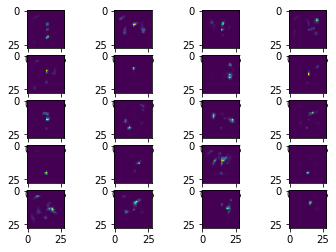

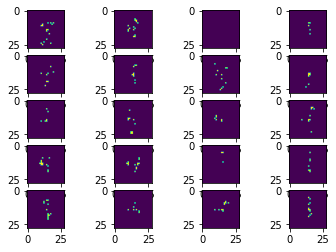

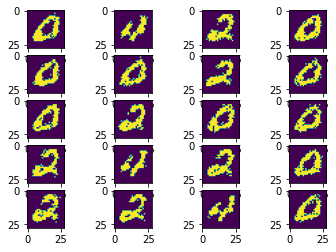

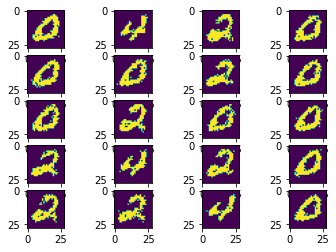

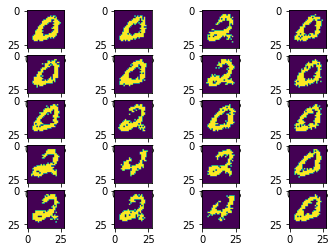

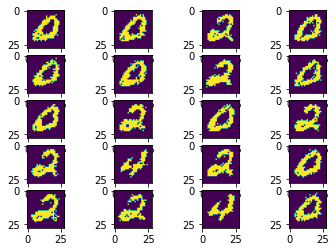

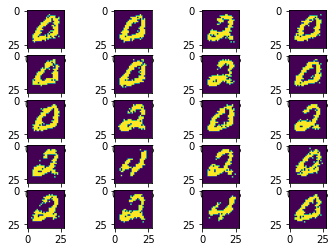

In [ ]:
b_h = rbm.intercept_hidden_
b_v = rbm.intercept_visible_
w = rbm.components_

with tf.Session():
    generated = tf.nn.sigmoid(tf.matmul(np.random.random(size=(20,100)), w) + b_v).eval()
    plt.figure()
    for i in range(20):
        plt.subplot(5,4,i + 1)
        plt.imshow(generated[i].reshape((28,28)))   

    for i in range(30000):
        generated = rbm.gibbs(generated)
        if i % 5000 == 0:
            plt.figure()
            for i in range(20):
                plt.subplot(5,4,i + 1)
                plt.imshow(generated[i].reshape((28,28)))                 
    generated = tf.nn.sigmoid(tf.matmul(generated.astype(np.float64), rbm.components_.T) + rbm.intercept_hidden_)
    generated = tf.nn.sigmoid(tf.matmul(generated,rbm.components_) + rbm.intercept_visible_)
                
for i in range(20):
    plt.subplot(5,4,i + 1)
    plt.imshow(generated.eval()[i].reshape((28,28)))    

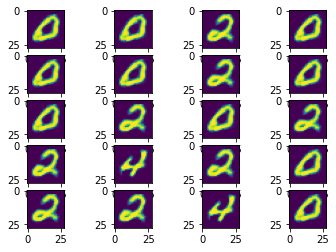

In [ ]:
with tf.Session() as _:
    for i in range(20):
        plt.subplot(5,4,i + 1)
        plt.imshow(generated.eval()[i].reshape((28,28))) 

In [ ]:
plt.figure(figsize=(10,10))
for i in range(w.shape[0]):
    plt.subplot(10,10,i+1)
    plt.imshow(np.reshape(w[i],(28,28)))
plt.show()

In [ ]:
# http://www.iro.umontreal.ca/~lisa/pointeurs/breuleux+bengio_nc2011.pdf
def RatesFPCDSample(base_params, fast_params, alpha, epsilon, rates, gibbs_steps, initial_sample):
    '''
    base_params: tuple
        (weights, hidden_bias, visible_bias)
    rates: tuple
        (R_w, R_h, R_v)
    '''
    with tf.Session():
        current_sample = initial_sample
        # rbm (784,100)
        for i in range(gibbs_steps):
            # hidden -> (nind, 100)
            # W -> (100, 784)
            # visible -> (nind, 784)
            hidden = tf.nn.sigmoid(tf.matmul(current_sample, tf.transpose(base_params[0] + fast_params[0])) + base_params[2] + fast_params[2]).eval()
            current_sample = tf.nn.sigmoid(tf.matmul(hidden, base_params[0] + fast_params[0]) + base_params[1] + fast_params[1]).eval()

        fast_params[0] = alpha*fast_params[0] + epsilon*(rates[0] - tf.matmul(current_sample,hidden))
        fast_params[1] = alpha*fast_params[1] + epsilon*(rates[1] - hidden)
        fast_params[2] = alpha*fast_params[2] + epsilon*(rates[2] - current_sample)
        
        return current_sample

In [ ]:
rates = np.array()
with tf.Session:
   h = rbm.transform(mnist) #h-> x,100
   # mnist -> (x,784)
   # w -> (100,784)
   # (100,784)
   # 100,100
   # tf.nn.sigmoid(tf.matmul(self.x, self.w) + self.hidden_bias)
   rates[0] = tf.nn.sigmoid(tf.matmul(tf.transpose(mnist), h)) # 100,784
   # hidden_p = tf.nn.sigmoid(tf.matmul(self.x, self.w) + self.hidden_bias)
   # u_b = tf.reduce_mean(hidden_p - hidden_recon_p, 0)
   # hidden_recon_p = tf.nn.sigmoid(tf.matmul(visible_recon_p, self.w) + self.hidden_bias)
   rates[1] = tf.nn.sigmoid(h)  # 100,
   rates[2] = tf.nn.sigmoid(mnist)
    


In [ ]:
w.shape